In [1]:
import pandas as pd

In [157]:
import matplotlib.pyplot as plt

In [158]:
dc_indi = pd.read_csv('../data/input/drug_indications_10122018.tsv',sep='\t')
dc_indi.head()

,DRUG_ID,DRUG_NAME,INDICATION_FDB,UMLS_CUI,SNOMEDCT_CUI,DOID
0,965,drostanolone propionate,Malignant tumor of breast,C0006142,254837009.0,DOID:1612
1,318,benzbromarone,Gout,C0018099,90560007.0,DOID:13189
2,318,benzbromarone,Hyperuricemia,C0740394,35885006.0,DOID:1920
3,1031,epitizide,Hypertensive disorder,C0020538,38341003.0,DOID:10763
4,3578,tafenoquine,Malaria,C0024530,61462000.0,DOID:12365


In [159]:
dc_indi.DOID= dc_indi.DOID.str.replace(':','_')

In [160]:
dc_indi.head()

,DRUG_ID,DRUG_NAME,INDICATION_FDB,UMLS_CUI,SNOMEDCT_CUI,DOID
0,965,drostanolone propionate,Malignant tumor of breast,C0006142,254837009.0,DOID_1612
1,318,benzbromarone,Gout,C0018099,90560007.0,DOID_13189
2,318,benzbromarone,Hyperuricemia,C0740394,35885006.0,DOID_1920
3,1031,epitizide,Hypertensive disorder,C0020538,38341003.0,DOID_10763
4,3578,tafenoquine,Malaria,C0024530,61462000.0,DOID_12365


In [2]:
df= pd.read_csv('../all_indi/XMLProduct_indications.csv')

In [11]:
df.head()

,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,Set_ID,Section
0,1bd850c4-a638-4143-b6be-0c50521a0449.xml,489,495,PREF,DISEASE,"Ribavirin for Inhalation Solution, USP is indi...",DOID_4,DB00811,Ribavirin,Ribavirin,d74aa4f3-0b7d-480d-b5bf-41ddf808b260,Indication
1,1bd850c4-a638-4143-b6be-0c50521a0449.xml,1036,1058,SYN,CARDIOPULMONARY DISEASE,"Ribavirin for Inhalation Solution, USP is indi...",DOID_8515,DB00811,Ribavirin,Ribavirin,d74aa4f3-0b7d-480d-b5bf-41ddf808b260,Indication
2,1bd850c4-a638-4143-b6be-0c50521a0449.xml,1908,1926,PREF,BACTERIAL PNEUMONIA,"Ribavirin for Inhalation Solution, USP is indi...",DOID_874,DB00811,Ribavirin,Ribavirin,d74aa4f3-0b7d-480d-b5bf-41ddf808b260,Indication
3,0028a8d7-5329-4faf-a7e0-ba3abb26b9b4.xml,489,495,PREF,DISEASE,"Ribavirin for inhalation solution, USP is indi...",DOID_4,DB00811,RIBAVIRIN,RIBAVIRIN,2c3a64d5-fde2-437b-bafc-e76dd187d85a,Indication
4,0028a8d7-5329-4faf-a7e0-ba3abb26b9b4.xml,1036,1058,SYN,CARDIOPULMONARY DISEASE,"Ribavirin for inhalation solution, USP is indi...",DOID_8515,DB00811,RIBAVIRIN,RIBAVIRIN,2c3a64d5-fde2-437b-bafc-e76dd187d85a,Indication


In [8]:
len(df)

127326

In [7]:

df_contra= pd.read_csv('../all_contra/XMLProduct_contrainidcations.csv')
df_contra.head()

,Unnamed: 0,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,Set_ID,Section
0,0,9f3ad5aa-8e9d-4512-88a5-15cfd50293f9.xml,371,383,PREF,PARAGANGLIOMA,\r\nConcomitant use or use in rapid succession...,DOID_0050773,DB00752,TRANYLCYPROMINE,PARNATE,b72d8187-dfcc-4ea0-b5e9-c0be95b69a27,Contraindication
1,1,9f3ad5aa-8e9d-4512-88a5-15cfd50293f9.xml,593,600,PREF,SYNDROME,\r\nConcomitant use or use in rapid succession...,DOID_225,DB00752,TRANYLCYPROMINE,PARNATE,b72d8187-dfcc-4ea0-b5e9-c0be95b69a27,Contraindication
2,2,9f3ad5aa-8e9d-4512-88a5-15cfd50293f9.xml,1388,1396,SYN,HAY FEVER,\r\nConcomitant use or use in rapid succession...,DOID_4481,DB00752,TRANYLCYPROMINE,PARNATE,b72d8187-dfcc-4ea0-b5e9-c0be95b69a27,Contraindication
3,3,4de045ff-f76c-48dd-9e5f-4a4f859eec8f.xml,371,383,PREF,PARAGANGLIOMA,\r\nConcomitant use or use in rapid succession...,DOID_0050773,DB00752,TRANYLCYPROMINE,Tranylcypromine Sulfate,6a0b609b-0625-4c26-91a1-59ee3ece3ddf,Contraindication
4,4,4de045ff-f76c-48dd-9e5f-4a4f859eec8f.xml,617,624,PREF,SYNDROME,\r\nConcomitant use or use in rapid succession...,DOID_225,DB00752,TRANYLCYPROMINE,Tranylcypromine Sulfate,6a0b609b-0625-4c26-91a1-59ee3ece3ddf,Contraindication


In [9]:
df_contra = df_contra.drop(columns=['Unnamed: 0'])

In [12]:
df_contra.to_csv('../all_contra/XMLProduct_contrainidcations1.csv', index=False)

In [6]:
len(df_contra)

59748

In [171]:
#df.DO_ID= df.DO_ID.str.replace('http://purl.obolibrary.org/obo/','')
#df = df.merge(label2setid, on=['Label_ID'])
#df['Section'] = 'Indication'
#len(df)
#df = df.drop(columns=['Unnamed: 0'])
#df.to_csv('../all_indi/XMLProduct_indications.csv',index=False)

In [173]:
df.head()

,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,Set_ID,Section
0,1bd850c4-a638-4143-b6be-0c50521a0449.xml,489,495,PREF,DISEASE,"Ribavirin for Inhalation Solution, USP is indi...",DOID_4,DB00811,Ribavirin,Ribavirin,d74aa4f3-0b7d-480d-b5bf-41ddf808b260,Indication
1,1bd850c4-a638-4143-b6be-0c50521a0449.xml,1036,1058,SYN,CARDIOPULMONARY DISEASE,"Ribavirin for Inhalation Solution, USP is indi...",DOID_8515,DB00811,Ribavirin,Ribavirin,d74aa4f3-0b7d-480d-b5bf-41ddf808b260,Indication
2,1bd850c4-a638-4143-b6be-0c50521a0449.xml,1908,1926,PREF,BACTERIAL PNEUMONIA,"Ribavirin for Inhalation Solution, USP is indi...",DOID_874,DB00811,Ribavirin,Ribavirin,d74aa4f3-0b7d-480d-b5bf-41ddf808b260,Indication
3,0028a8d7-5329-4faf-a7e0-ba3abb26b9b4.xml,489,495,PREF,DISEASE,"Ribavirin for inhalation solution, USP is indi...",DOID_4,DB00811,RIBAVIRIN,RIBAVIRIN,2c3a64d5-fde2-437b-bafc-e76dd187d85a,Indication
4,0028a8d7-5329-4faf-a7e0-ba3abb26b9b4.xml,1036,1058,SYN,CARDIOPULMONARY DISEASE,"Ribavirin for inhalation solution, USP is indi...",DOID_8515,DB00811,RIBAVIRIN,RIBAVIRIN,2c3a64d5-fde2-437b-bafc-e76dd187d85a,Indication


In [54]:
DOID_list = list (dc_indi.DOID.unique())

In [55]:
DOID_list[:5]

['DOID_1612', 'DOID_13189', 'DOID_1920', 'DOID_10763', 'DOID_12365']

In [140]:
df =df[df.DO_ID.isin(DOID_list)]

In [11]:
#df = df[~df.Annotation.isin(['DISEASE','CANCER','SYNDROME'])]

In [58]:
df.Annotation.value_counts()

HYPERTENSION                      7688
STROKE                            4254
MYOCARDIAL INFARCTION             3696
ANXIETY                           2493
CORONARY HEART DISEASE            2338
PANIC DISORDER                    2119
PNEUMONIA                         1846
GERD                              1650
GENERALIZED ANXIETY DISORDER      1396
DUODENAL ULCER                    1208
GASTRIC ULCER                     1097
MIGRAINE                          1048
BREAST CANCER                     1009
EPILEPSY                           991
INFLUENZA                          953
BIPOLAR DISORDER                   901
VASCULAR DISEASE                   849
ACUTE MYOCARDIAL INFARCTION        792
NEPHROTIC SYNDROME                 744
GENITAL HERPES                     694
ANXIETY DISORDER                   688
HYPOTHYROIDISM                     635
CHRONIC BRONCHITIS                 624
PHARYNGITIS                        614
AMEBIASIS                          612
URETHRITIS               

In [141]:
df.head()

,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name
2,1bd850c4-a638-4143-b6be-0c50521a0449.xml,1908,1926,PREF,BACTERIAL PNEUMONIA,"Ribavirin for Inhalation Solution, USP is indi...",DOID_874,DB00811,Ribavirin,Ribavirin
5,0028a8d7-5329-4faf-a7e0-ba3abb26b9b4.xml,1891,1909,PREF,BACTERIAL PNEUMONIA,"Ribavirin for inhalation solution, USP is indi...",DOID_874,DB00811,RIBAVIRIN,RIBAVIRIN
16,3fa42a10-6874-4b83-945f-10d7668d2138.xml,1647,1655,PREF,INFLUENZA,Ribavirin is a nucleoside analogue indicated f...,DOID_8469,DB00811,RIBAVIRIN,Ribavirin
27,1921cdc9-e68e-4007-a607-563bf1e64c0d.xml,1647,1655,PREF,INFLUENZA,Ribavirin is a nucleoside analogue indicated f...,DOID_8469,DB00811,RIBAVIRIN,Ribavirin
30,475531fa-6496-4ab4-bb9b-54fd1fcb36ad.xml,1464,1482,PREF,BACTERIAL PNEUMONIA,VIRAZOLE\r\n(r)\r\nOnly severe RSV lower respi...,DOID_874,DB00811,Ribavirin,Virazole


In [142]:
len(df)

77019

In [61]:
db_atc = pd.read_csv('../data/input/drugbank_atc_codes.csv') 

In [62]:
len(db_atc)

4963

In [63]:
db_atc = db_atc.drop_duplicates(subset=['dbid'],keep='first')

In [64]:
len(db_atc)

3145

In [65]:
db_atc = db_atc.rename(columns={'dbid':'DB_ID'})

In [66]:
df = df.merge(db_atc,on=['DB_ID'])

In [67]:
len(df)

75054

In [22]:
df.head()

,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,atc_label
0,1bd850c4-a638-4143-b6be-0c50521a0449.xml,1908,1926,PREF,BACTERIAL PNEUMONIA,"Ribavirin for Inhalation Solution, USP is indi...",DOID_874,DB00811,Ribavirin,Ribavirin,J05AP01
1,0028a8d7-5329-4faf-a7e0-ba3abb26b9b4.xml,1891,1909,PREF,BACTERIAL PNEUMONIA,"Ribavirin for inhalation solution, USP is indi...",DOID_874,DB00811,RIBAVIRIN,RIBAVIRIN,J05AP01
2,3fa42a10-6874-4b83-945f-10d7668d2138.xml,1647,1655,PREF,INFLUENZA,Ribavirin is a nucleoside analogue indicated f...,DOID_8469,DB00811,RIBAVIRIN,Ribavirin,J05AP01
3,1921cdc9-e68e-4007-a607-563bf1e64c0d.xml,1647,1655,PREF,INFLUENZA,Ribavirin is a nucleoside analogue indicated f...,DOID_8469,DB00811,RIBAVIRIN,Ribavirin,J05AP01
4,475531fa-6496-4ab4-bb9b-54fd1fcb36ad.xml,1464,1482,PREF,BACTERIAL PNEUMONIA,VIRAZOLE\r\n(r)\r\nOnly severe RSV lower respi...,DOID_874,DB00811,Ribavirin,Virazole,J05AP01


In [23]:
#df =df.drop_duplicates(subset=['DO_ID','DB_ID'])
#len(df)

In [24]:
df['ATC_LEVEL_0']= df['atc_label'].str[0]

In [198]:
def getDiseaseTerm(row):
   #print (row)
    from_ = row['From']
    to_ = row['To']
    return row['Context'][from_-1:to_]

df['DieaseName']= df.apply(getDiseaseTerm, axis='columns')

In [26]:
counter = []
for index, row in df.iterrows():
    test = row['Context']
    #Counts the number of entries at row x and adds it to the counter list
    counter.append(len(test.split()))

#df.Text.str.split('\n', expand=True).stack()
#The word count list is now appended to the context file
df['WordCount'] = counter

In [27]:
df = df[df.WordCount > 100]
df = df[df.WordCount < 300]

In [28]:
groups = df.groupby('ATC_LEVEL_0')

In [29]:
MAX_NUMBER_EACH_CATEG = 500
selected = pd.DataFrame()
for name, group in groups:
    print(name)
    if len(group) > MAX_NUMBER_EACH_CATEG:
        selected= selected.append(group.sample(n=MAX_NUMBER_EACH_CATEG))
    else:
        selected= selected.append(group)

A
B
C
D
G
H
J
L
M
N
R
S
V


In [30]:
len(selected)

5803

In [31]:
selected.head()

,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,atc_label,ATC_LEVEL_0,DieaseName,WordCount
60870,848840b4-c132-0b17-e053-2991aa0a92e7.xml,1148,1182,SYN,IDIOPATHIC THROMBOCYTOPENIC PURPURA,"Prednisone Tablets, USP are indicated in the f...",DOID_8924,DB00635,PREDNISONE,Prednisone,A07EA03,A,Idiopathic thrombocytopenic purpura,228
60829,c5059922-60d7-4a59-a058-ad0eeb720e10.xml,358,387,PREF,CONGENITAL ADRENAL HYPERPLASIA,"Prednisone Tablets, USP are indicated in the f...",DOID_0050811,DB00635,PREDNISONE,Prednisone,A07EA03,A,Congenital adrenal hyperplasia,228
72482,5b34be13-02eb-4537-bd24-ffdf76f66902.xml,1650,1653,SYN,GERD,Ranitidine Tablets are indicated in:\r\n1. Sho...,DOID_8534,DB00863,RANITIDINE,Ranitidine,A02BA07,A,GERD,244
60750,7be6595a-5927-f65e-e053-2991aa0ae3cb.xml,652,679,PREF,SYSTEMIC LUPUS ERYTHEMATOSUS,"Prednisone Tablets, USP are indicated in the f...",DOID_9074,DB00635,PREDNISONE,Prednisone,A07EA03,A,Systemic lupus erythematosus,228
73258,3ed6c98a-1300-1e8d-e054-00144ff88e88.xml,832,844,PREF,GASTRIC ULCER,Ranitidine tablets USP are indicated in:\r\n \...,DOID_10808,DB00863,RANITIDINE,Ranitidine,A02BA07,A,gastric ulcer,235


In [32]:
len(selected)

5803

In [148]:
df_contra = pd.read_csv("../all_contra/XMLProduct_annotations.csv") 

In [149]:
df_contra.DO_ID = df_contra.DO_ID.str.replace('http://purl.obolibrary.org/obo/','')

In [150]:
len(df_contra)

59748

In [151]:
df_contra = df_contra.merge(label2setid, on=['Label_ID'])

In [153]:
df_contra['Section'] = 'Contraindication'

In [154]:
df_contra.to_csv("../all_contra/XMLProduct_annotations.csv") 

In [152]:
len(df_contra)

59748

In [102]:
df_contra =df_contra[df_contra.DO_ID.isin(DOID_list)]
#df_contra = df_contra[~df_contra.Annotation.isin(['DISEASE','CANCER','SYNDROME','HYPERSENSITIVITY'])]

In [103]:
df_contra.Annotation.value_counts()

ASTHMA                                                      3042
ANGIOEDEMA                                                  2724
GLAUCOMA                                                    1031
STEVENS-JOHNSON SYNDROME                                     836
MYOCARDIAL INFARCTION                                        759
HYPERTENSION                                                 715
STROKE                                                       659
MIGRAINE                                                     493
HYPERTHYROIDISM                                              493
AV BLOCK                                                     454
CORONARY ARTERY DISEASE                                      449
CONGESTIVE HEART FAILURE                                     448
RASH                                                         409
PARALYTIC ILEUS                                              396
ACUTE MYOCARDIAL INFARCTION                                  346
ANOREXIA NERVOSA         

In [104]:
df_contra.head()

,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name
11,e918dba4-419d-4b0e-a50a-7c8767cbacfc.xml,98,105,PREF,GLAUCOMA,Alprazolam orally disintegrating tablets are c...,DOID_1686,DB00404,ALPRAZOLAM,Alprazolam
12,e918dba4-419d-4b0e-a50a-7c8767cbacfc.xml,757,764,PREF,GLAUCOMA,Alprazolam orally disintegrating tablets are c...,DOID_1686,DB00404,ALPRAZOLAM,Alprazolam
13,e918dba4-419d-4b0e-a50a-7c8767cbacfc.xml,256,274,SYN,OPEN ANGLE GLAUCOMA,Alprazolam orally disintegrating tablets are c...,DOID_1067,DB00404,ALPRAZOLAM,Alprazolam
14,1f7b926e-6962-4437-a2ea-02120983631b.xml,67,74,PREF,GLAUCOMA,Alprazolam is contraindicated in patients with...,DOID_1686,DB00404,ALPRAZOLAM,Alprazolam
15,1f7b926e-6962-4437-a2ea-02120983631b.xml,165,183,SYN,OPEN ANGLE GLAUCOMA,Alprazolam is contraindicated in patients with...,DOID_1067,DB00404,ALPRAZOLAM,Alprazolam


In [105]:
len(df_contra)

18280

In [106]:
df_contra = df_contra.merge(db_atc,on=['DB_ID'])

In [107]:
df_contra['ATC_LEVEL_0']= df_contra['atc_label'].str[0]

In [108]:
df_contra.head()

,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,atc_label,ATC_LEVEL_0
0,e918dba4-419d-4b0e-a50a-7c8767cbacfc.xml,98,105,PREF,GLAUCOMA,Alprazolam orally disintegrating tablets are c...,DOID_1686,DB00404,ALPRAZOLAM,Alprazolam,N05BA12,N
1,e918dba4-419d-4b0e-a50a-7c8767cbacfc.xml,757,764,PREF,GLAUCOMA,Alprazolam orally disintegrating tablets are c...,DOID_1686,DB00404,ALPRAZOLAM,Alprazolam,N05BA12,N
2,e918dba4-419d-4b0e-a50a-7c8767cbacfc.xml,256,274,SYN,OPEN ANGLE GLAUCOMA,Alprazolam orally disintegrating tablets are c...,DOID_1067,DB00404,ALPRAZOLAM,Alprazolam,N05BA12,N
3,1f7b926e-6962-4437-a2ea-02120983631b.xml,67,74,PREF,GLAUCOMA,Alprazolam is contraindicated in patients with...,DOID_1686,DB00404,ALPRAZOLAM,Alprazolam,N05BA12,N
4,1f7b926e-6962-4437-a2ea-02120983631b.xml,165,183,SYN,OPEN ANGLE GLAUCOMA,Alprazolam is contraindicated in patients with...,DOID_1067,DB00404,ALPRAZOLAM,Alprazolam,N05BA12,N


In [109]:
df_contra['DieaseName']= df_contra.apply(getDiseaseTerm, axis='columns')

NameError: name 'getDiseaseTerm' is not defined

In [43]:
counter = []
for index, row in df_contra.iterrows():
    test = row['Context']
    #Counts the number of entries at row x and adds it to the counter list
    counter.append(len(test.split()))

#df.Text.str.split('\n', expand=True).stack()
#The word count list is now appended to the context file
df_contra['WordCount'] = counter

In [44]:
df_contra = df_contra[df_contra.WordCount > 100]
df_contra = df_contra[df_contra.WordCount < 300]

In [45]:
groups = df_contra.groupby('ATC_LEVEL_0')

In [46]:
selected_contra = pd.DataFrame()
for name, group in groups:
    print(name)
    if len(group) > MAX_NUMBER_EACH_CATEG:
        selected_contra= selected_contra.append(group.sample(n=MAX_NUMBER_EACH_CATEG))
    else:
        selected_contra= selected_contra.append(group)

A
B
C
D
G
H
J
L
M
N
R
S


In [47]:
len(selected_contra)

4039

In [48]:
selected= selected.append(selected_contra)

In [49]:
selected.head()

,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,atc_label,ATC_LEVEL_0,DieaseName,WordCount
60870,848840b4-c132-0b17-e053-2991aa0a92e7.xml,1148,1182,SYN,IDIOPATHIC THROMBOCYTOPENIC PURPURA,"Prednisone Tablets, USP are indicated in the f...",DOID_8924,DB00635,PREDNISONE,Prednisone,A07EA03,A,Idiopathic thrombocytopenic purpura,228
60829,c5059922-60d7-4a59-a058-ad0eeb720e10.xml,358,387,PREF,CONGENITAL ADRENAL HYPERPLASIA,"Prednisone Tablets, USP are indicated in the f...",DOID_0050811,DB00635,PREDNISONE,Prednisone,A07EA03,A,Congenital adrenal hyperplasia,228
72482,5b34be13-02eb-4537-bd24-ffdf76f66902.xml,1650,1653,SYN,GERD,Ranitidine Tablets are indicated in:\r\n1. Sho...,DOID_8534,DB00863,RANITIDINE,Ranitidine,A02BA07,A,GERD,244
60750,7be6595a-5927-f65e-e053-2991aa0ae3cb.xml,652,679,PREF,SYSTEMIC LUPUS ERYTHEMATOSUS,"Prednisone Tablets, USP are indicated in the f...",DOID_9074,DB00635,PREDNISONE,Prednisone,A07EA03,A,Systemic lupus erythematosus,228
73258,3ed6c98a-1300-1e8d-e054-00144ff88e88.xml,832,844,PREF,GASTRIC ULCER,Ranitidine tablets USP are indicated in:\r\n \...,DOID_10808,DB00863,RANITIDINE,Ranitidine,A02BA07,A,gastric ulcer,235


In [50]:
selected.to_csv("../data/output/selected_tasks.csv", index=False)

In [51]:

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

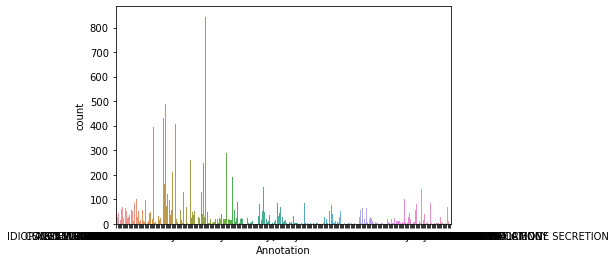

In [52]:
ocean_plot = sns.countplot(x = 'Annotation', data = selected)

In [53]:
selected = selected.sort_values(['Annotation'])

In [54]:
selected = selected.drop_duplicates(subset=['DO_ID','DB_ID'])

In [55]:
selected.head()

,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,atc_label,ATC_LEVEL_0,DieaseName,WordCount
68279,d7dc088b-d348-4fdc-9a6c-a6a1d435148f.xml,332,341,PREF,ACROMEGALY,Bromocriptine mesylate tablets and capsules ar...,DOID_2449,DB01200,BROMOCRIPTINE,Bromocriptine mesylate,N04BC01,N,acromegaly,280
50460,960e183d-d9b4-4a2b-8596-45d999719131.xml,649,661,PREF,ACTINOMYCOSIS,"Penicillin G Potassium Injection, USP is indic...",DOID_8478,DB01053,PENICILLIN G,PENICILLIN G POTASSIUM,J01CR50,J,Actinomycosis,261
73793,38c60396-7501-486e-9f95-2c896b085a7b.xml,144,157,PREF,ACUTE CYSTITIS,"Nitrofurantoin capsules, USP (monohydrate/macr...",DOID_13148,DB00698,NITROFURANTOIN,Nitrofurantoin,J01XE01,J,acute cystitis,157
54565,0bc6880d-f1f7-4881-9912-54ba77036982.xml,540,567,SYN,ACUTE LYMPHOBLASTIC LEUKEMIA,Imatinib mesylate is a kinase inhibitor indica...,DOID_9952,DB00619,IMATINIB,Imatinib Mesylate,L01XE01,L,acute lymphoblastic leukemia,176
70674,0e9e8fcc-07ad-449a-a312-1dcba2c96abe.xml,127,152,PREF,ACUTE LYMPHOCYTIC LEUKEMIA,Methotrexate is indicated in the treatment of ...,DOID_9952,DB00563,METHOTREXATE,Methotrexate,L04AX03,L,acute lymphocytic leukemia,261


In [56]:
len(selected)

845

In [116]:
selected.to_csv("../data/output/selected_tasks.csv", index=False)

In [117]:
selected = pd.read_csv('../trial.csv')

In [118]:
selected.head()

,Unnamed: 0,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,atc_label,ATC_LEVEL_0,DieaseName,WordCount
0,0,d7dc088b-d348-4fdc-9a6c-a6a1d435148f.xml,332,341,PREF,ACROMEGALY,Bromocriptine mesylate tablets and capsules ar...,DOID_2449,DB01200,BROMOCRIPTINE,Bromocriptine mesylate,N04BC01,N,acromegaly,280
1,1,960e183d-d9b4-4a2b-8596-45d999719131.xml,649,661,PREF,ACTINOMYCOSIS,"Penicillin G Potassium Injection, USP is indic...",DOID_8478,DB01053,PENICILLIN G,PENICILLIN G POTASSIUM,J01CR50,J,Actinomycosis,261
2,2,38c60396-7501-486e-9f95-2c896b085a7b.xml,144,157,PREF,ACUTE CYSTITIS,"Nitrofurantoin capsules, USP (monohydrate/macr...",DOID_13148,DB00698,NITROFURANTOIN,Nitrofurantoin,J01XE01,J,acute cystitis,157
3,3,0bc6880d-f1f7-4881-9912-54ba77036982.xml,540,567,SYN,ACUTE LYMPHOBLASTIC LEUKEMIA,Imatinib mesylate is a kinase inhibitor indica...,DOID_9952,DB00619,IMATINIB,Imatinib Mesylate,L01XE01,L,acute lymphoblastic leukemia,176
4,4,0e9e8fcc-07ad-449a-a312-1dcba2c96abe.xml,127,152,PREF,ACUTE LYMPHOCYTIC LEUKEMIA,Methotrexate is indicated in the treatment of ...,DOID_9952,DB00563,METHOTREXATE,Methotrexate,L04AX03,L,acute lymphocytic leukemia,261


In [119]:
label2setid = pd.read_csv('../labelid_setid.csv', sep='\t')

In [120]:
label2setid.head()

,Label_ID,Set_ID
0,291423bd-d8d3-4438-935c-f131dc57523a.xml,484affc2-a8fe-4430-bb52-00ad678ca8f1
1,5aa27e45-f7a4-471d-869e-be2eb166e07e.xml,97674aec-5e1a-40d4-b753-d38a829c550f
2,6945848a-8716-4414-9ea8-e66d159ebc3b.xml,d0054c4c-1149-4d4b-a302-587aa4bbdaad
3,7bbfb226-2193-6d24-e053-2991aa0a71ca.xml,fef7f0c9-48a1-46b4-a19c-c23d272a8ca2
4,7c23fd25-9ea4-7665-e053-2991aa0adcfd.xml,70d0d3eb-ee89-54da-e053-2991aa0a675f


In [121]:
indexes_no_phrase_in_text = [3, 5, 8, 15, 28, 201,221,240,318,367,404,570,600,658,738]
#indexes_no_phrase_in_text= [x+2 for x in indexes_no_phrase_in_text ]

In [122]:
selected= selected[~selected.index.isin(indexes_no_phrase_in_text)]

In [123]:
selected =selected.merge(label2setid, on=['Label_ID'])

In [124]:
len(selected)

830

In [110]:
df['Section'] = 'Indication'
df_contra['Section'] = 'Contraindication'

In [128]:
my_df = df[['Section','Label_ID','From','To']].append(df_contra[['Section','Label_ID','From','To']])

In [129]:
len(my_df)

92371

In [130]:
selction =selected.merge(my_df, on=['Label_ID','From','To'])

In [131]:
len(selction)

830

In [135]:
selction[selction.Section=='Indication']

,Unnamed: 0,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,atc_label,ATC_LEVEL_0,DieaseName,WordCount,Set_ID,Section
0,0,d7dc088b-d348-4fdc-9a6c-a6a1d435148f.xml,332,341,PREF,ACROMEGALY,Bromocriptine mesylate tablets and capsules ar...,DOID_2449,DB01200,BROMOCRIPTINE,Bromocriptine mesylate,N04BC01,N,acromegaly,280,97e7e051-ff64-4381-a869-6c1c364ad822,Indication
1,1,960e183d-d9b4-4a2b-8596-45d999719131.xml,649,661,PREF,ACTINOMYCOSIS,"Penicillin G Potassium Injection, USP is indic...",DOID_8478,DB01053,PENICILLIN G,PENICILLIN G POTASSIUM,J01CR50,J,Actinomycosis,261,9e58122f-5c75-4905-a774-d3a4dae4ff8c,Indication
2,145,960e183d-d9b4-4a2b-8596-45d999719131.xml,735,742,PREF,BOTULISM,"Penicillin G Potassium Injection, USP is indic...",DOID_11976,DB01053,PENICILLIN G,PENICILLIN G POTASSIUM,J01CR50,J,Botulism,261,9e58122f-5c75-4905-a774-d3a4dae4ff8c,Indication
3,2,38c60396-7501-486e-9f95-2c896b085a7b.xml,144,157,PREF,ACUTE CYSTITIS,"Nitrofurantoin capsules, USP (monohydrate/macr...",DOID_13148,DB00698,NITROFURANTOIN,Nitrofurantoin,J01XE01,J,acute cystitis,157,58614369-f5ac-4d38-9fb8-2383b791eb71,Indication
4,4,0e9e8fcc-07ad-449a-a312-1dcba2c96abe.xml,127,152,PREF,ACUTE LYMPHOCYTIC LEUKEMIA,Methotrexate is indicated in the treatment of ...,DOID_9952,DB00563,METHOTREXATE,Methotrexate,L04AX03,L,acute lymphocytic leukemia,261,fd0f56ef-d598-4735-9bc5-beca06ea814d,Indication
5,6,654fea8d-5e0a-43a4-af56-9a08067f9fc3.xml,1784,1808,PREF,ACUTE MAXILLARY SINUSITIS,"Clarithromycin tablets, USP are indicated for ...",DOID_2050,DB01211,CLARITHROMYCIN,Clarithromycin,A02BD11,A,Acute maxillary sinusitis,262,b1bdf526-4f16-4130-b614-4cb678f060d7,Indication
6,802,654fea8d-5e0a-43a4-af56-9a08067f9fc3.xml,198,208,PREF,TONSILLITIS,"Clarithromycin tablets, USP are indicated for ...",DOID_10456,DB01211,CLARITHROMYCIN,Clarithromycin,A02BD11,A,Tonsillitis,262,b1bdf526-4f16-4130-b614-4cb678f060d7,Indication
7,7,f239b734-cd48-4577-8742-3084d6c25001.xml,1045,1069,PREF,ACUTE MAXILLARY SINUSITIS,Cefpodoxime proxetil is indicated for the trea...,DOID_2050,DB01416,CEFPODOXIME,Cefpodoxime Proxetil,J01DD13,J,Acute maxillary sinusitis,141,edf589b2-f796-4522-a5e6-2bd0a833922f,Indication
9,10,e561a5af-c541-4ef0-b027-9d1af884ac72.xml,1292,1318,PREF,ACUTE MYOCARDIAL INFARCTION,Levothyroxine sodium is used for the following...,DOID_9408,DB00451,LEVOTHYROXINE,Levothyroxine,H03AA01,H,acute myocardial infarction,221,3177aea1-c0c6-4ae1-b20e-3ca66a949e2c,Indication
12,13,8ae3e6d6-7156-440b-b2a6-b00279519252.xml,423,449,PREF,ACUTE MYOCARDIAL INFARCTION,Hypertension \nMetoprolol tartrate tablets are...,DOID_9408,DB00264,METOPROLOL,Metoprolol Tartrate,C07FB02,C,acute myocardial infarction,103,7859c799-8dd0-44e3-bfdb-ae07052cd888,Indication


In [136]:
selction.to_csv('selection.csv')

In [98]:
all_indicatio_text

array([['1bd850c4-a638-4143-b6be-0c50521a0449.xml', 'DOID_874'],
       ['0028a8d7-5329-4faf-a7e0-ba3abb26b9b4.xml', 'DOID_874'],
       ['3fa42a10-6874-4b83-945f-10d7668d2138.xml', 'DOID_8469'],
       ...,
       ['7301eec3-0d3c-4d44-b517-e22eb4791f13.xml', 'DOID_1459'],
       ['b81720f9-2836-4c1d-8691-0f6acef13316.xml', 'DOID_1459'],
       ['9138d770-e647-44a0-b9d3-f6b6b3f6eb41.xml', 'DOID_1459']],
      dtype=object)

In [99]:
all_indicatio_text['1bd850c4-a638-4143-b6be-0c50521a0449.xml']['DOID_874']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [180]:
len(selction.dropna(subset=['Section']))

830

In [214]:
gold_df = pd.read_csv('../data/selected_tasks - gold_standard.csv')

In [215]:
gold_df.head()

,Unnamed: 0,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name,atc_label,ATC_LEVEL_0,DieaseName,WordCount,Set_ID,Section,Gold standard annotation
0,101,../DailyMedExtracter/prescription/temp_xml/be0...,396,408,PREF,HYDROCEPHALUS,Leflunomide tablets are contraindicated in pat...,DOID_10908,DB01097,Leflunomide,LEFLUNOMIDE,NaN,NaN,NaN,NaN,NaN,NaN,effect
1,50,../DailyMedExtracter/prescription/temp_xml/521...,562,575,SYN,ENCEPHALOPATHY,Hypersensitivity to acetazolamide or any excip...,DOID_936,DB00819,Acetazolamide,acetazolamide,NaN,NaN,NaN,NaN,NaN,NaN,effect
2,53,../DailyMedExtracter/prescription/temp_xml/357...,363,372,PREF,DERMATITIS,['Rivastigmine tartrate capsules are contraind...,DOID_2723,DB00989,Rivastigmine Tartrate,RIVASTIGMINE,NaN,NaN,NaN,NaN,NaN,NaN,effect
3,5,3e077a23-c652-4eb7-9c70-955f5418f648.xml,2309,2318,PREF,ANGIOEDEMA,"CaptoprilåÊTablets, USPåÊare indicated for the...",DOID_1558,DB01197,NaN,CAPTOPRIL,NaN,NaN,NaN,NaN,NaN,NaN,effect
4,8,f8b6425e-e87a-40d3-880f-360dad30a97a.xml,1600,1607,PREF,DIARRHEA,\n \nIn the treatment of p...,DOID_13250,DB00572,NaN,ATROPINE,NaN,NaN,NaN,NaN,NaN,NaN,effect


In [193]:
def replace_prefix(label):
    if label.startswith('../DailyMedExtracter/prescription/temp_xml/'):
        return label.replace('../DailyMedExtracter/prescription/temp_xml/','')[:-3]
    else:
        return label[:-3]

gold_df.Label_ID = gold_df.Label_ID.apply(replace_prefix)

In [190]:
contra = pd.read_csv('../data/cleanData(ADLE).csv')

In [191]:
contra.head()

,Label_ID,From,To,Type,Annotation,Context,DO_ID,DB_ID,DrugName,Drug_Brand_Name
0,d9460161-f53b-4b5c-9be6-920dcc008a6e,896,914,PREF,SPINAL CORD DISEASE,Cyclobenzaprine hydrochloride extended-release...,http://purl.obolibrary.org/obo/DOID_319,DB00924,CYCLOBENZAPRINE,Cyclobenzaprine Hydrochloride
1,d9460161-f53b-4b5c-9be6-920dcc008a6e,908,914,PREF,DISEASE,Cyclobenzaprine hydrochloride extended-release...,http://purl.obolibrary.org/obo/DOID_4,DB00924,CYCLOBENZAPRINE,Cyclobenzaprine Hydrochloride
2,d9460161-f53b-4b5c-9be6-920dcc008a6e,936,949,PREF,CEREBRAL PALSY,Cyclobenzaprine hydrochloride extended-release...,http://purl.obolibrary.org/obo/DOID_1969,DB00924,CYCLOBENZAPRINE,Cyclobenzaprine Hydrochloride
3,d9460161-f53b-4b5c-9be6-920dcc008a6e,1444,1457,PREF,CEREBRAL PALSY,Cyclobenzaprine hydrochloride extended-release...,http://purl.obolibrary.org/obo/DOID_1969,DB00924,CYCLOBENZAPRINE,Cyclobenzaprine Hydrochloride
4,f6ee739e-acea-4ba9-b43b-5ff4aa23dd0a,26,33,PREF,IMPETIGO,"Primary skin infections: Impetigo contagiosa, ...",http://purl.obolibrary.org/obo/DOID_8504,DB00798,GENTAMICIN,Gentamicin Sulfate


In [196]:
gold_df.merge(contra, on= ['Label_ID','Annotation', 'DrugName'])

,Unnamed: 0,Label_ID,From_x,To_x,Type_x,Annotation,Context_x,DO_ID_x,DB_ID_x,DrugName,...,Set_ID,Section,Gold standard annotation,From_y,To_y,Type_y,Context_y,DO_ID_y,DB_ID_y,Drug_Brand_Name_y


In [216]:
def getDiseaseTerm(row):
   #print (row)
    print (row['From'], row['To'])
    from_ =int( row['From'])
    to_ = int(row['To'])
    
    return row['Context'][from_-1:to_]
gold_df['DieaseName'] =gold_df.apply(getDiseaseTerm, axis='columns')

396 408
562 575
363 372
2309 2318
1600 1607
151 161
370 376
311 322
73 84
35 49
120 125
463 486
777 791
119 146
153 171
89 107
137 155
101 121
170 178
147 156
192 199
152 164
195 232
272 285
367 394
398 409
154 171
121 128
242 259
332 351
988 995
72 96
208 225
379 395
764 778
592 613
762 783
485 504


In [218]:
gold_df.to_csv('gold.csv')